In [1]:
%matplotlib inline

In [2]:
import pymongo
import pandas as pd

In [3]:
#configuracion mongo y conexion a db
client = pymongo.MongoClient("mongodb://localhost:27017/")
sentencias_db = client['Sentencias']
sentencias_coll = sentencias_db['Sentencias Judiciales']

In [4]:
with open("hechos.txt", encoding="utf-8") as file:
    lista_hechos = [l.rstrip("\n") for l in file]

In [5]:
df = pd.DataFrame(index=lista_hechos)
df['conteo'] = 0
df.head()

,conteo
comienzo de la personalidad,0
mayoría de edad,0
capacidad de obrar,0
incapacidad de obrar,0
protección a la vida,0


In [6]:
for hecho in lista_hechos:
    veces_mencionado = sentencias_coll.count_documents( {"hechos": hecho} )
    df['conteo'][hecho]= veces_mencionado

In [7]:
df.sort_values('conteo',ascending=False)
df_mas_mencionados = df.sort_values('conteo',ascending=False).head(16)
df_mas_mencionados['hecho'] = df_mas_mencionados.index

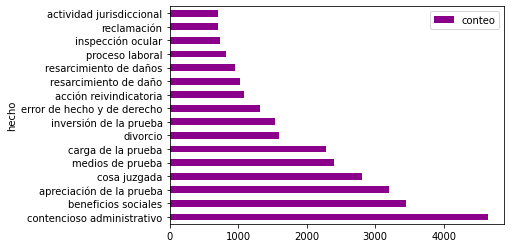

In [9]:
plt = df_mas_mencionados.plot.barh(x='hecho', y='conteo', rot=0, color='#8B008B')

In [10]:
plt.figure.savefig('hechos_mas_comunes.png')